<a href="https://colab.research.google.com/github/ShaownBuetBme/understanding-networks/blob/main/erotic_poem_writer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [6]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2024-06-30 12:48:55--  https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.18.207, 142.250.153.207, 142.250.145.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.18.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.1s    

2024-06-30 12:48:56 (616 KB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [7]:
from os import times_result
tokenizer = Tokenizer()
data = open('/content/erotic_poem_data_set.txt').read()

corpus = data.lower().split("\n");
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index)+1
total_words

1802

In [8]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

#pad sequence
max_sequence_len =max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding = 'pre'))

#create predictors and labels

xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes = total_words)


In [9]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['the'])


11
3
553
9
3


In [10]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length = max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation= 'softmax'));
adam = Adam(lr = 0.01)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
# earlystop = Earlystopping(monitor = 'val_loss', min_delta = 0, patience = 5,
# verbose= 0, mode = 'auto')
history = model.fit(xs, ys, epochs = 100, verbose= 1)
#print(model.summery())
print(model)

Epoch 1/100
227/227 [==============================] - 17s 31ms/step - loss: 6.6557 - accuracy: 0.0286
Epoch 2/100
227/227 [==============================] - 4s 15ms/step - loss: 6.1523 - accuracy: 0.0359
Epoch 3/100
227/227 [==============================] - 2s 10ms/step - loss: 5.9344 - accuracy: 0.0435
Epoch 4/100
227/227 [==============================] - 2s 9ms/step - loss: 5.6870 - accuracy: 0.0607
Epoch 5/100
227/227 [==============================] - 2s 9ms/step - loss: 5.4154 - accuracy: 0.0744
Epoch 6/100
227/227 [==============================] - 2s 9ms/step - loss: 5.1382 - accuracy: 0.0893
Epoch 7/100
227/227 [==============================] - 2s 9ms/step - loss: 4.8173 - accuracy: 0.1032
Epoch 8/100
227/227 [==============================] - 2s 9ms/step - loss: 4.4860 - accuracy: 0.1338
Epoch 9/100
227/227 [==============================] - 2s 7ms/step - loss: 4.1701 - accuracy: 0.1620
Epoch 10/100
227/227 [==============================] - 2s 7ms/step - loss: 3.8493 - ac

In [14]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
   plt.plot(history.history[string])
   plt.xlabel("Epochs")
   plt.ylabel(string)
   plt.show()

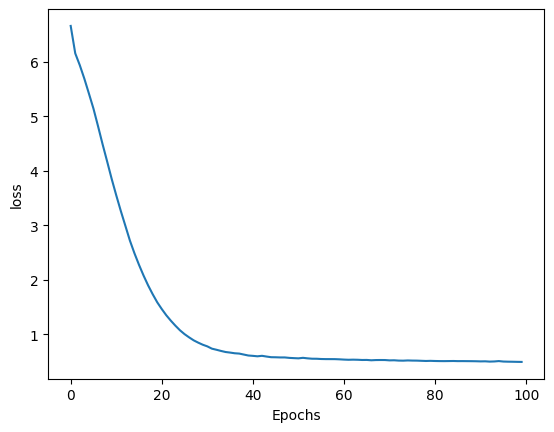

In [15]:
plot_graphs(history,'loss')


In [18]:
seed_text = "I will squeez your ass. bit your clit"
next_words = 100
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen = max_sequence_len-1, padding = 'pre')
  predicted =np.argmax(model.predict(token_list), axis = -1)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
  print(seed_text)

1/1 [==============================] - 0s 20ms/step
I will squeez your ass. bit your clit convenient
1/1 [==============================] - 0s 18ms/step
I will squeez your ass. bit your clit convenient fit
1/1 [==============================] - 0s 23ms/step
I will squeez your ass. bit your clit convenient fit with
1/1 [==============================] - 0s 18ms/step
I will squeez your ass. bit your clit convenient fit with my
1/1 [==============================] - 0s 20ms/step
I will squeez your ass. bit your clit convenient fit with my bed
1/1 [==============================] - 0s 18ms/step
I will squeez your ass. bit your clit convenient fit with my bed look
1/1 [==============================] - 0s 18ms/step
I will squeez your ass. bit your clit convenient fit with my bed look lie
1/1 [==============================] - 0s 22ms/step
I will squeez your ass. bit your clit convenient fit with my bed look lie mouth
1/1 [==============================] - 0s 17ms/step
I will squeez your ass